In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy import stats
from sklearn.feature_selection import SelectFromModel
df = pd.read_csv("train.csv")


In [5]:
df=pd.read_csv('train.csv')
print("size: ", df.size)
print("columns: ", list(df.columns))
print("type: ", df.dtypes)

size:  128856
columns:  ['customer_id', 'customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score', 'customer_active_segment', 'X1', 'customer_category']
type:  customer_id                          object
customer_visit_score                float64
customer_product_search_score       float64
customer_ctr_score                  float64
customer_stay_score                 float64
customer_frequency_score            float64
customer_product_variation_score    float64
customer_order_score                float64
customer_affinity_score             float64
customer_active_segment              object
X1                                   object
customer_category                     int64
dtype: object


In [54]:
df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,3811,3,4,0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,6829,3,0,0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,5348,3,2,0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,2763,1,4,0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,10338,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,1832,3,2,0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,2859,3,2,0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,7816,0,2,0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,10624,2,1,0


In [69]:
df = df.dropna()
df

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,C,F,0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,C,A,0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,C,BA,0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,AA,F,0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,C,BA,0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,C,BA,0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,A,BA,0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,B,AA,0


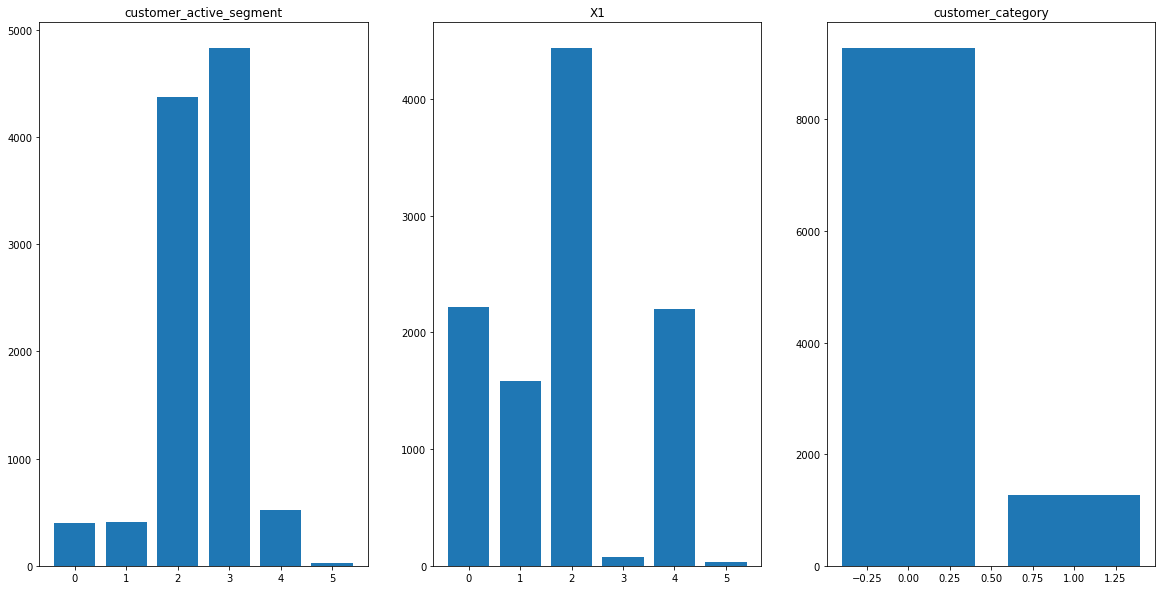

In [56]:
cols = df.columns[-3:]
fig, axs = plt.subplots(1, 3, figsize=(20,  10))
    
for i in range(3): #build barplot
    d = dict(df[cols[i]].value_counts())
    axs[i].set_title(f"{cols[i]}")
    axs[i].bar(d.keys(), d.values())
plt.show()

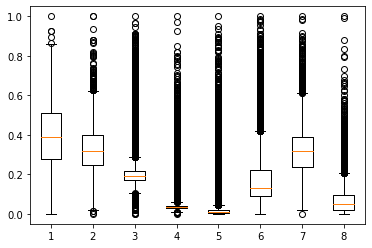

In [72]:
cols = list(df.columns[1:-3])
plt.boxplot(df[cols]) # build boxplot
plt.show()

array([[<AxesSubplot:title={'center':'customer_affinity_score'}>]],
      dtype=object)

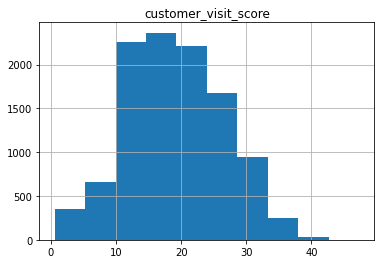

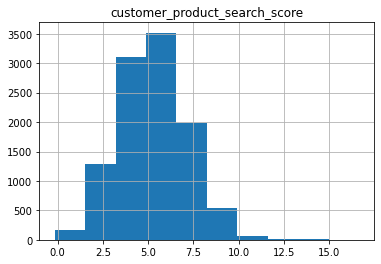

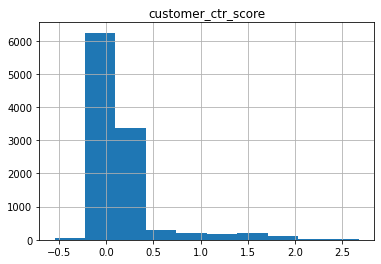

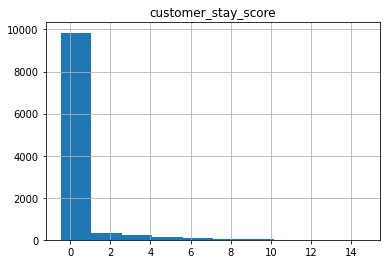

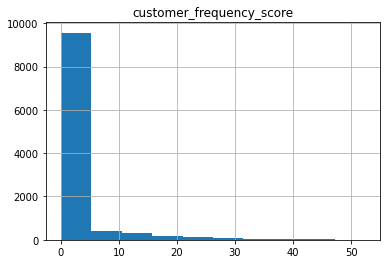

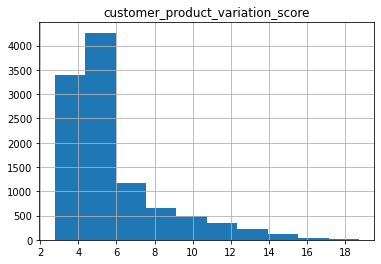

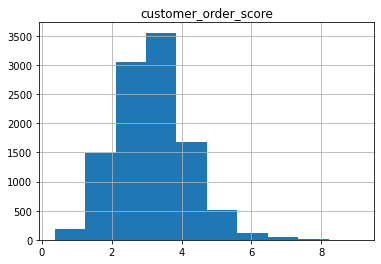

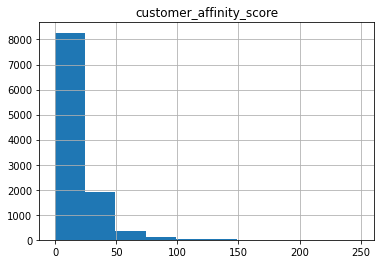

In [58]:
df=pd.read_csv('train.csv') #hisrograms using pandas

v=df.hist(column='customer_visit_score')
v
p=df.hist(column='customer_product_search_score')
p
ctr=df.hist(column='customer_ctr_score')
ctr
s=df.hist(column='customer_stay_score')
s
f=df.hist(column='customer_frequency_score')
f
pv=df.hist(column='customer_product_variation_score')
pv
o=df.hist(column='customer_order_score')
o
a=df.hist(column='customer_affinity_score')
a


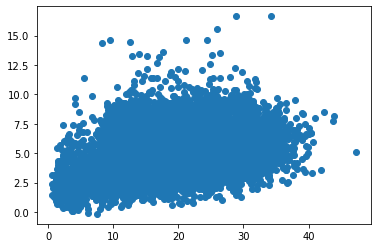

In [59]:
plt.scatter(df.customer_visit_score, df.customer_product_search_score)#scatter example

In [60]:
df.mean(axis=0)#mean

customer_visit_score                19.060941
customer_product_search_score        5.274847
customer_ctr_score                   0.175912
customer_stay_score                  0.374230
customer_frequency_score             2.376895
customer_product_variation_score     5.788180
customer_order_score                 3.150071
customer_affinity_score             17.061836
customer_category                    0.120600
dtype: float64

In [61]:
df.std()#standard deviation


customer_visit_score                 7.419609
customer_product_search_score        1.882559
customer_ctr_score                   0.372829
customer_stay_score                  1.222031
customer_frequency_score             5.601911
customer_product_variation_score     2.531309
customer_order_score                 1.035416
customer_affinity_score             18.762693
customer_category                    0.325677
dtype: float64

In [62]:
c = df.corr()#correlation matrix
c

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_category
customer_visit_score,1.000000,0.274672,-0.569430,-0.474176,-0.209270,-0.220016,0.170497,0.118925,-0.449654
customer_product_search_score,0.274672,1.000000,-0.415910,-0.414855,-0.023031,-0.066274,0.051181,0.044181,-0.300862
customer_ctr_score,-0.569430,-0.415910,1.000000,0.909248,0.419461,0.448071,-0.342506,-0.232876,0.794445
customer_stay_score,-0.474176,-0.414855,0.909248,1.000000,0.400374,0.406516,-0.311451,-0.210629,0.679366
customer_frequency_score,-0.209270,-0.023031,0.419461,0.400374,1.000000,0.702688,-0.533142,-0.326201,0.389465
customer_product_variation_score,-0.220016,-0.066274,0.448071,0.406516,0.702688,1.000000,-0.694476,-0.525783,0.493958
customer_order_score,0.170497,0.051181,-0.342506,-0.311451,-0.533142,-0.694476,1.000000,0.763861,-0.385278
customer_affinity_score,0.118925,0.044181,-0.232876,-0.210629,-0.326201,-0.525783,0.763861,1.000000,-0.274105
customer_category,-0.449654,-0.300862,0.794445,0.679366,0.389465,0.493958,-0.385278,-0.274105,1.000000


In [63]:
df['X1'].value_counts()#frequency
df['customer_active_segment'].value_counts()

C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64

In [64]:
df['X1'].value_counts()#frequency

BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64

In [65]:
df['customer_category'].value_counts()#frequency

0    9443
1    1295
Name: customer_category, dtype: int64

In [70]:
ncols = df.columns[1:-3]
df[ncols] = df[ncols].apply(lambda x: (x-x.min())/(x.max()-x.min())) #normalizing
norm = df
norm

c:\users\katyu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,C,F,0
1,csid_2,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,C,A,0
2,csid_3,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,C,BA,0
3,csid_4,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,AA,F,0
4,csid_5,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,C,AA,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10733,csid_10734,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,C,BA,0
10734,csid_10735,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,C,BA,0
10735,csid_10736,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,A,BA,0
10736,csid_10737,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,B,AA,0


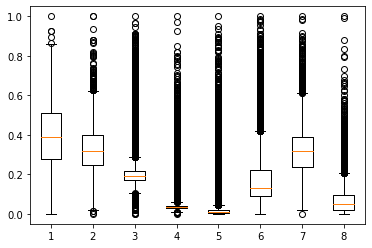

In [71]:
fig, axs = plt.subplots() #after normalizing
axs.boxplot(df[ncols])
plt.show()

<AxesSubplot:>

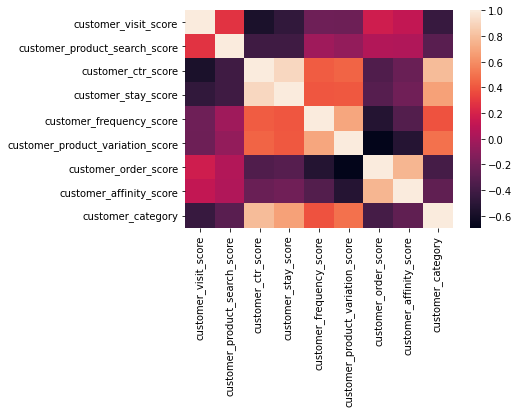

In [73]:
import seaborn
seaborn.heatmap(df.corr())#heatmap using seaborn

In [74]:
from sklearn.preprocessing import LabelEncoder#encoding 
cols = norm.columns[-3::]
le = LabelEncoder()
norm[cols] = norm[cols].apply(lambda col: le.fit_transform(col))
enc=norm[norm.columns[1::]]
enc

c:\users\katyu\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0
10735,0.665584,0.473913,0.189297,0.028338,0.005529,0.177953,0.233728,0.089749,0,2,0
10736,0.596367,0.342273,0.140686,0.035879,0.001978,0.054009,0.528128,0.351176,2,1,0


In [93]:
new = enc.copy()#removing outliers
new=new[['customer_visit_score', 'customer_product_search_score', 'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score', 'customer_product_variation_score', 'customer_order_score', 'customer_affinity_score','customer_active_segment','X1','customer_category']]
new = new[(np.abs(stats.zscore(new)) < 3).all(axis=1)]
new

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,0.269578,0.571994,0.148038,0.021297,0.007799,0.122126,0.249190,0.033916,3,4,0
1,0.353548,0.445888,0.217287,0.023724,0.006717,0.090820,0.438887,0.072295,3,0,0
2,0.362370,0.315807,0.202852,0.047831,0.007430,0.107950,0.402852,0.052530,3,2,0
3,0.660161,0.302359,0.163523,0.023870,0.014314,0.144000,0.268779,0.021209,1,4,0
4,0.242642,0.261843,0.227785,0.041900,0.002549,0.043300,0.379749,0.229374,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10731,0.610325,0.390081,0.153900,0.025240,0.007759,0.127516,0.215561,0.027057,2,2,0
10732,0.301578,0.327601,0.183398,0.022250,0.004592,0.113201,0.380645,0.058437,3,0,0
10733,0.494325,0.408534,0.198567,0.029356,0.022568,0.265826,0.305235,0.009797,3,2,0
10734,0.537126,0.396409,0.185348,0.027385,0.013303,0.166010,0.314068,0.022531,3,2,0


In [85]:
X = new[new.columns[:-1]]#applying Random Forest classifier
y = new['customer_category']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7)
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [86]:
p=metrics.precision_score(y_test, y_pred,zero_division='warn')#for each class print: precision, recall, accuracy

r=metrics.recall_score(y_test, y_pred,zero_division='warn')

a=metrics.accuracy_score(y_test, y_pred)

In [87]:
print("Precision:")
p

Precision:


0.9411764705882353

In [88]:
print("Recall:")
r

Recall:


0.7384615384615385

In [89]:
print("Accuracy:")
a

Accuracy:


0.9705557600294442

In [90]:
sel = SelectFromModel(RandomForestClassifier())#improve Random Forest classification accuracy by applying Feature Selection algorithms
sel.fit(X_train, y_train)
selected_feat= X_train[X_train.columns[(sel.get_support())]]
print(selected_feat)
classifier_2 = RandomForestClassifier()
classifier_2.fit(X_train, y_train)
y2_pred = classifier_2.predict(X_test)
print(sel.get_support())

      customer_ctr_score  customer_stay_score
9990            0.170974             0.036630
7417            0.161202             0.027002
4642            0.230047             0.048782
682             0.211651             0.037612
4966            0.227662             0.060369
...                  ...                  ...
6915            0.153741             0.032014
5990            0.234029             0.055356
2901            0.238858             0.072157
5644            0.173896             0.035552
6385            0.161605             0.039416

[6339 rows x 2 columns]
[False False  True  True False False False False False False]


In [91]:
a2=metrics.accuracy_score(y_test, y2_pred)
print("Accuracy after applying feature selection:")
a2

Accuracy after applying feature selection:


0.9709238130290762